In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
%matplotlib widget

In [3]:
z1 = np.arange(1e+6,1e+2,5000)
Yn = np.array([0,1,3,5,7,9,11,13,15])
colors = plt.colormaps['jet'].resampled(9)

In [4]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.72548 #K

In [5]:
G = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2 * (2*K**3*T**3)/(vc**2*h_pl**2)
Y = lambda x: G(x) * ( x* (np.exp(x)+1)/(np.exp(x)-1)-4 ) 
M = lambda x: G(x)* (0.4561-1.0/x) 


In [6]:
folder = 'outputs/fhm-5e5/PDE-non-linear/Greens/'


 
file_path = os.path.join(folder, f"Dn_0.delta-z.dat")


op = pd.read_csv(file_path, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb= op.iat[0,1]


In [7]:
mu = 1.401e-5 * Jbb

In [8]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX

In [17]:

folder = 'outputs/fhm-5e5/'

xyn= []
DIyn= []
for i in range (len(Yn)):
    file_path = os.path.join(folder, f"Y{Yn[i]}_0.1/.dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn.append(op.iloc[:, 0].values)
    DIyn.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

file_path = os.path.join(folder, "PDE-non-linear/Dn.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)
x = HC.iloc[:, 0].values
DI = (HC.iloc[:, 5].values)

xyn2= []
DIyn2= []
for i in range (len(Yn)):
    file_path = os.path.join(folder, f"Y{Yn[i]}_1/.dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn2.append(op.iloc[:, 0].values)
    DIyn2.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!
    

In [10]:

#folder = 'outputs/Y15/'
#
#file_path = os.path.join(folder, ".dat_ymax15_y_bg.spec")
#op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
#    
#
#A2 = np.array(op.iloc[:, 0].values)
#B2 = np.array((op.iloc[:, 1].values))



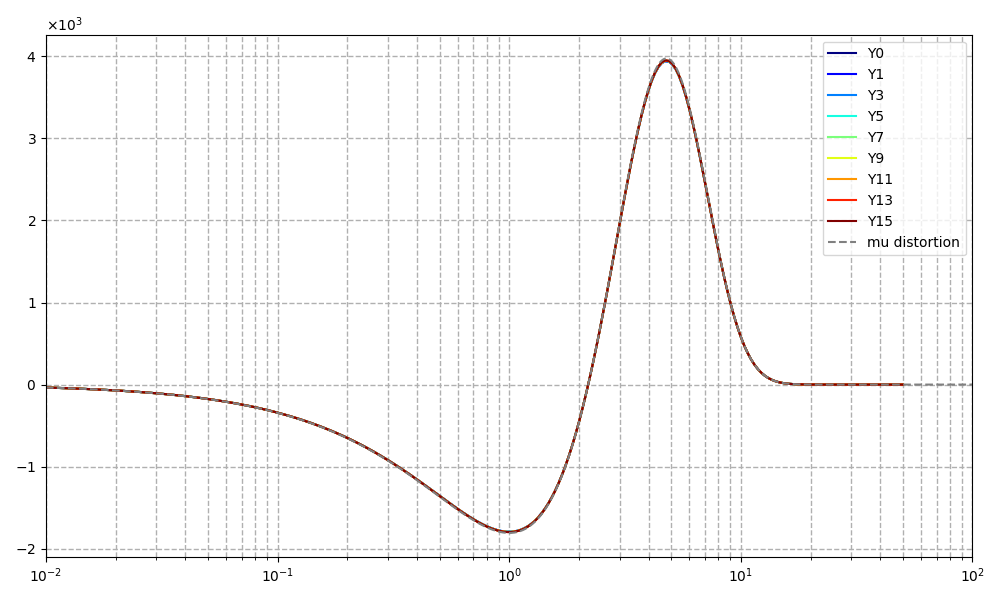

In [11]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
#fig.suptitle(f"Particle decay scenario ")

# Plot per DI_N2 (primo subplot)
for i in range (len(Yn)):
    ax1.plot(xyn[i],DIyn[i], label = f"Y{Yn[i]}", color = colors(i))

#ax1.plot(x,DI, label = "standard runmode", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)


# Plot per DT2 (secondo subplot)

#ax1.plot(A2,B2, label = "Y15")

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

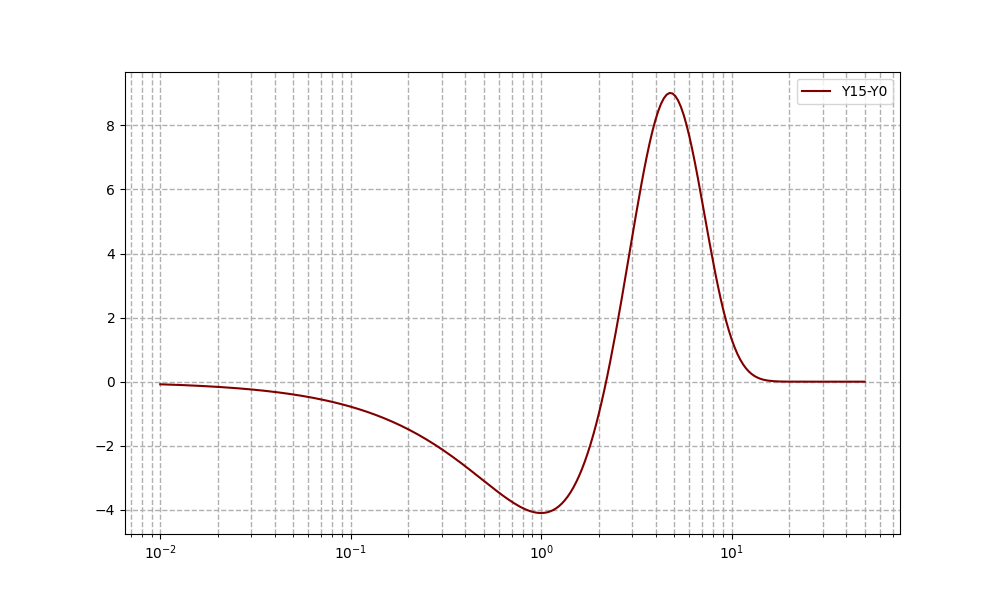

In [21]:

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
#fig.suptitle(f"Particle decay scenario ")


ax1.plot(xyn[i],np.array(DIyn[8])-np.array(DIyn[0]), label ="Y15-Y0", color = colors(i))
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax1.set_xscale('log')
ax1.legend()
